In [882]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
import numpy as np
import datetime
import seaborn as sns
import csv

rawdata_dataframe = pd.read_csv('NCWIT_DataV2_NormalizedMajors.csv')
#rawdata_dataframe

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [883]:
# Import list of major into major groups mapping, convert to a dictionary
with open('major-mapping-dict.csv') as f:
    d = dict(filter(None, csv.reader(f)))

In [827]:
rawdata_dataframe.describe()

,Record#,Institution,"Enroll, Female: Avg. ACT Math Score (Enrl F)","Enroll, Female: Asian (Enrl F)","Enroll, Female: Average Age (Enrl F)","Enroll, Female: Average HS GPA (Enrl F)","Enroll, Female: Avg. SAT Math Score (Enrl F)","Enroll, Female: Black/African American (Enrl F)","Enroll, Female: Hispanics of any race (Enrl F)","Enroll, Female: American Indian/Alaska Native (Enrl F)",...,Nonresident Alien (Min. M).1,Race/Ethnicity Unknown (Min. M).1,Nonresident Alien (Min. F).2,Race/Ethnicity Unknown (Min. F).2,Nonresident Alien (Min. M).2,Race/Ethnicity Unknown (Min. M).2,Nonresident Alien (Tot. F),Race/Ethnicity Unknown (Tot. F),Nonresident Alien (Tot. M),Race/Ethnicity Unknown (Tot. M)
count,2905.000000,2905.000000,302.000000,808.000000,748.000000,641.000000,587.000000,768.000000,764.000000,660.000000,...,67.000000,81.000000,67.000000,82.000000,67.000000,81.000000,528.000000,642.000000,553.000000,682.000000
mean,3287.309466,242.800344,26.705571,4.559406,19.911783,3.660892,641.493102,1.522135,7.197644,0.109091,...,2.522388,0.888889,1.388060,0.280488,2.522388,0.888889,6.522727,3.188474,25.632911,17.313783
std,1132.019847,144.741446,3.758858,11.583175,3.280935,0.309436,176.796799,2.197434,23.885187,0.335428,...,5.535993,2.974895,3.242498,1.057301,5.535993,2.974895,13.408749,7.643397,45.577345,31.665535
min,1226.000000,4.000000,17.000000,0.000000,0.000000,2.330000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2383.000000,112.000000,24.000000,0.000000,18.000000,3.480000,570.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
50%,3250.000000,238.000000,27.000000,1.000000,19.000000,3.700000,630.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,7.000000,6.000000
75%,4228.000000,368.000000,29.500000,4.000000,20.342500,3.840000,684.500000,2.000000,3.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,2.000000,0.000000,6.000000,3.750000,24.000000,21.000000
max,5356.000000,500.000000,35.000000,152.000000,59.000000,4.646000,1296.000000,15.000000,162.000000,2.000000,...,26.000000,18.000000,18.000000,6.000000,26.000000,18.000000,87.000000,133.000000,270.000000,396.000000


In [884]:
# Get rid of the blank rows of data at the bottom of the file
rawdata_dataframe = rawdata_dataframe.dropna(thresh=4)

In [885]:
# Map high-level major categories onto major names and store in a new column
rawdata_dataframe['Major'] = rawdata_dataframe['Major Program Name'].map(d)
rawdata_dataframe

,Record#,CIP# Only,Major Program Name,Degree Level,NCWIT Participant,Institution,What degrees does your institution offer?,School Year,When do students typically declare their major?,"Enroll, Female: Avg. ACT Math Score (Enrl F)",...,Race/Ethnicity Unknown (Min. M).1,Nonresident Alien (Min. F).2,Race/Ethnicity Unknown (Min. F).2,Nonresident Alien (Min. M).2,Race/Ethnicity Unknown (Min. M).2,Nonresident Alien (Tot. F),Race/Ethnicity Unknown (Tot. F),Nonresident Alien (Tot. M),Race/Ethnicity Unknown (Tot. M),Major
0,1231.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2005-2006,End of 2nd Year,27.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computer Science
1,1232.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2006-2007,End of 2nd Year,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computer Science
2,1233.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2007-2008,End of 2nd Year,27.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computer Science
3,1234.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2008-2009,End of 2nd Year,31.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computer Science
4,1235.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2009-2010,End of 2nd Year,27.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computer Science
5,1236.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2010-2011,End of 2nd Year,24.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computer Science
6,1237.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",456.0,Bachelor's and master's degrees only,2011-2012,End of 2nd Year,26.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computer Science
7,1498.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",128.0,"Bachelor's, master's, and Ph.D. degrees",2004-2005,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computer Science
8,1499.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",128.0,"Bachelor's, master's, and Ph.D. degrees",2005-2006,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computer Science
9,1500.0,11.01,CS and/or Eng Multiple Majors (data submitted ...,Bachelor's,"Extension Services, Academic Alliance",128.0,"Bachelor's, master's, and Ph.D. degrees",2006-2007,Upon Enrollment,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Computer Science


In [886]:
# Tells us how many records have information for "When do students typically declare their major?"
rawdata_dataframe["When do students typically declare their major?"].count()

2905

In [887]:
# Tells us the unique values for this category
rawdata_dataframe["When do students typically declare their major?"].unique()

array(['End of 2nd Year', 'Upon Enrollment', 'End of 1st Year', 'Other',
       'Other ', 'Upon Enrollment ', 'End of 2nd Year ', 'Upon Enrollent',
       'End of 1st Year ', 'university closed'], dtype=object)

In [837]:
# Replace incorrect values/resolve duplicates
rawdata_dataframe.replace(to_replace="Upon Enrollent", value="Upon Enrollment", inplace=True)
rawdata_dataframe.replace(to_replace="Upon Enrollment ", value="Upon Enrollment", inplace=True)
rawdata_dataframe.replace(to_replace="End of 2nd Year ", value="End of 2nd Year", inplace=True)
rawdata_dataframe.replace(to_replace="End of 1st Year ", value="End of 1st Year", inplace=True)
rawdata_dataframe.replace(to_replace="Other ", value="Other", inplace=True)

In [838]:
# Counts "When do students typically declare their major" -- note that will have to add the duplicates together
rawdata_dataframe["When do students typically declare their major?"].value_counts()

Upon Enrollment      1376
End of 2nd Year       630
Other                 500
End of 1st Year       388
university closed      11
Name: When do students typically declare their major?, dtype: int64

In [839]:
# Just curious -- crosstabbing by major and enrollment decision date
ct = pd.crosstab(rawdata_dataframe["Major Program Name"], rawdata_dataframe["When do students typically declare their major?"])
ct

When do students typically declare their major?,End of 1st Year,End of 2nd Year,Other,Upon Enrollment,university closed
Major Program Name,,,,,
Aerospace Engineering,0,0,2,9,0
Applied Engineering Sciences,0,0,4,0,0
Biosystems Engineering,0,0,4,0,0
Business Technology,8,0,0,5,0
CS and/or Eng Multiple Majors (data submitted in aggregation),2,19,0,76,0
Chemical Engineering,0,0,7,0,0
Civil Engineering,0,0,10,14,0
Computational Biology,0,11,2,4,0
Computational Mathematics,2,2,0,1,0


In [840]:
# select just the columns we need
ungrouped = rawdata_dataframe[['Institution','Major','When do students typically declare their major?','School Year','Totals, Female: Total Declared Majors (Tot. F)','Totals, Male: Total Declared Majors (Tot. M)','Totals, Female: Graduated (Tot. F)','Totals, Male: Graduated (Tot. M)']]

In [841]:
ungrouped.head()

,Institution,Major,When do students typically declare their major?,School Year,"Totals, Female: Total Declared Majors (Tot. F)","Totals, Male: Total Declared Majors (Tot. M)","Totals, Female: Graduated (Tot. F)","Totals, Male: Graduated (Tot. M)"
0,456.0,Computer Science,End of 2nd Year,2005-2006,22.0,88.0,14.0,56.0
1,456.0,Computer Science,End of 2nd Year,2006-2007,22.0,75.0,10.0,41.0
2,456.0,Computer Science,End of 2nd Year,2007-2008,16.0,55.0,4.0,14.0
3,456.0,Computer Science,End of 2nd Year,2008-2009,11.0,18.0,5.0,10.0
4,456.0,Computer Science,End of 2nd Year,2009-2010,15.0,29.0,6.0,12.0


In [842]:
# calculate percent females enrolled and percent females graduated, as well as total enrolled and total graduates
ungrouped['Total_majors'] = ungrouped['Totals, Female: Total Declared Majors (Tot. F)']+ungrouped['Totals, Male: Total Declared Majors (Tot. M)']
ungrouped['Total_graduates'] = ungrouped['Totals, Female: Graduated (Tot. F)']+ungrouped['Totals, Male: Graduated (Tot. M)']
ungrouped['Perc_F_majors'] = ungrouped['Totals, Female: Total Declared Majors (Tot. F)']/ungrouped['Total_majors']
ungrouped['Perc_F_graduates'] = ungrouped['Totals, Female: Graduated (Tot. F)']/ungrouped['Total_graduates']

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [843]:
# Drop rows with no data for percent female graduates, store as new dataframe
ungrouped_graduates = ungrouped.dropna(subset=['Perc_F_graduates'])
ungrouped_graduates

,Institution,Major,When do students typically declare their major?,School Year,"Totals, Female: Total Declared Majors (Tot. F)","Totals, Male: Total Declared Majors (Tot. M)","Totals, Female: Graduated (Tot. F)","Totals, Male: Graduated (Tot. M)",Total_majors,Total_graduates,Perc_F_majors,Perc_F_graduates
0,456.0,Computer Science,End of 2nd Year,2005-2006,22.0,88.0,14.0,56.0,110.0,70.0,0.200000,0.200000
1,456.0,Computer Science,End of 2nd Year,2006-2007,22.0,75.0,10.0,41.0,97.0,51.0,0.226804,0.196078
2,456.0,Computer Science,End of 2nd Year,2007-2008,16.0,55.0,4.0,14.0,71.0,18.0,0.225352,0.222222
3,456.0,Computer Science,End of 2nd Year,2008-2009,11.0,18.0,5.0,10.0,29.0,15.0,0.379310,0.333333
4,456.0,Computer Science,End of 2nd Year,2009-2010,15.0,29.0,6.0,12.0,44.0,18.0,0.340909,0.333333
5,456.0,Computer Science,End of 2nd Year,2010-2011,9.0,30.0,7.0,8.0,39.0,15.0,0.230769,0.466667
6,456.0,Computer Science,End of 2nd Year,2011-2012,10.0,29.0,3.0,17.0,39.0,20.0,0.256410,0.150000
8,128.0,Computer Science,Upon Enrollment,2005-2006,34.0,408.0,9.0,61.0,442.0,70.0,0.076923,0.128571
9,128.0,Computer Science,Upon Enrollment,2006-2007,28.0,406.0,4.0,74.0,434.0,78.0,0.064516,0.051282
10,128.0,Computer Science,Upon Enrollment,2007-2008,23.0,366.0,10.0,54.0,389.0,64.0,0.059126,0.156250


In [844]:
# Drop rows with no data for percent females enrolled, store as a new dataframe
ungrouped_enrolled = ungrouped.dropna(subset=['Perc_F_majors'])
ungrouped_enrolled

,Institution,Major,When do students typically declare their major?,School Year,"Totals, Female: Total Declared Majors (Tot. F)","Totals, Male: Total Declared Majors (Tot. M)","Totals, Female: Graduated (Tot. F)","Totals, Male: Graduated (Tot. M)",Total_majors,Total_graduates,Perc_F_majors,Perc_F_graduates
0,456.0,Computer Science,End of 2nd Year,2005-2006,22.0,88.0,14.0,56.0,110.0,70.0,0.200000,0.200000
1,456.0,Computer Science,End of 2nd Year,2006-2007,22.0,75.0,10.0,41.0,97.0,51.0,0.226804,0.196078
2,456.0,Computer Science,End of 2nd Year,2007-2008,16.0,55.0,4.0,14.0,71.0,18.0,0.225352,0.222222
3,456.0,Computer Science,End of 2nd Year,2008-2009,11.0,18.0,5.0,10.0,29.0,15.0,0.379310,0.333333
4,456.0,Computer Science,End of 2nd Year,2009-2010,15.0,29.0,6.0,12.0,44.0,18.0,0.340909,0.333333
5,456.0,Computer Science,End of 2nd Year,2010-2011,9.0,30.0,7.0,8.0,39.0,15.0,0.230769,0.466667
6,456.0,Computer Science,End of 2nd Year,2011-2012,10.0,29.0,3.0,17.0,39.0,20.0,0.256410,0.150000
7,128.0,Computer Science,Upon Enrollment,2004-2005,42.0,424.0,0.0,NaN,466.0,NaN,0.090129,NaN
8,128.0,Computer Science,Upon Enrollment,2005-2006,34.0,408.0,9.0,61.0,442.0,70.0,0.076923,0.128571
9,128.0,Computer Science,Upon Enrollment,2006-2007,28.0,406.0,4.0,74.0,434.0,78.0,0.064516,0.051282


In [845]:
# Check to make sure 0 values didn't get accidentally dropped as nulls 
print(ungrouped_enrolled.loc[ungrouped_enrolled['Totals, Female: Total Declared Majors (Tot. F)'] == 0])

      Institution                   Major  \
151         114.0  Information Technology   
213          37.0  Information Technology   
214          37.0  Information Technology   
317          64.0        Computer Science   
328         114.0        Computer Science   
329         114.0        Computer Science   
330         114.0        Computer Science   
331         114.0        Computer Science   
332         114.0        Computer Science   
333         114.0        Computer Science   
339          47.0        Computer Science   
345         337.0        Computer Science   
347         337.0        Computer Science   
348         337.0        Computer Science   
389         157.0        Computer Science   
509         379.0     Information Systems   
548          32.0     Information Systems   
549          32.0     Information Systems   
826          21.0        Computer Science   
830          21.0        Computer Science   
1002        270.0        Computer Science   
1029      

In [846]:
# Export dataframes to CSVs
ungrouped_enrolled.to_csv("ungrouped-major-institution-perc-female-enrolled.csv")
ungrouped_graduates.to_csv("ungrouped-major-institution-perc-female-graduates.csv")

In [847]:
# This sums over all the years for each institution and major
# Note that we are now losing the information about when they declare the majors -- perhaps this is because we lose all the
# info that can't be summed!
# Could fix this by making a different data frame for each category
# Note that I didn't end up using this, but it's still kinda interesting...
grouped = rawdata_dataframe.groupby(['Institution', 'Major Program Name','When do students typically declare their major?']).sum()

In [848]:
# select just the columns we need
grouped_condensed = grouped[['Totals, Female: Total Declared Majors (Tot. F)','Totals, Male: Total Declared Majors (Tot. M)','Totals, Female: Graduated (Tot. F)','Totals, Male: Graduated (Tot. M)']]
grouped_condensed
# Note that within a single institution and major, there could be multiple times listed for when students declare their majors!
# This could be because the policy changed year to year, or it could just be an error in the data submitted

Totals, Female: Total Declared Majors (Tot. F)  \
Institution Major Program Name                                 When do students typically declare their major?                                                   
4.0         Computational Mathematics                          End of 2nd Year                                                                             2.0   
            Computer Science                                   Upon Enrollment                                                                             8.0   
6.0         Computer Science                                   Upon Enrollment                                                                           409.0   
            Information Science                                Upon Enrollment                                                                           216.0   
7.0         Computer Science                                   Upon Enrollment                                                                            57.0   
            Information Technology                             Upon Enrollment                                                                            38.0   
9.0         Computer Science                                   End of 2nd Year                                                                           424.0   
13.0        Computer Engineering                               Upon Enrollment                                                                           101.0   
            Computer Information Systems                       Upon Enrollment                                                                           334.0   
            Computer Science                                   Other                                                                                     357.0   
                                                               Upon Enrollment                                                                           507.0   
            Computer Systems Engineering                       Upon Enrollment                                                                            56.0   
            Electrical Engineering                             Upon Enrollment                                                                            85.0   
            Mechanical Engineering                             Upon Enrollment                                                                           228.0   
14.0        Computer Science                                   Upon Enrollment                                                                            52.0   
            Management Information Systems                     Upon Enrollment                                                                            69.0   
18.0        Computer Engineering                               End of 2nd Year                                                                             3.0   
            Computer Science                                   End of 2nd Year                                                                             8.0   
20.0        Computer Science                                   End of 2nd Year                                                                            72.0   
21.0        CS and/or Eng Multiple Majors (data submitted i... End of 2nd Year                                                                            66.0   
            Computer Science                                   End of 2nd Year                                                                            11.0   
25.0        Computer Information Systems                       Upon Enrollment                                                                           373.0   
            Computer Science                                   Upon Enrollment                                                                           240.0   
26.0        Computer Engineering                              

In [849]:
# calculate percent females enrolled and percent females graduated, as well as total enrolled and total graduates
grouped_condensed['Total_majors'] = grouped_condensed['Totals, Female: Total Declared Majors (Tot. F)']+grouped_condensed['Totals, Male: Total Declared Majors (Tot. M)']
grouped_condensed['Total_graduates'] = grouped_condensed['Totals, Female: Graduated (Tot. F)']+grouped_condensed['Totals, Male: Graduated (Tot. M)']
grouped_condensed['Perc_F_majors'] = grouped_condensed['Totals, Female: Total Declared Majors (Tot. F)']/grouped_condensed['Total_majors']
grouped_condensed['Perc_F_graduates'] = grouped_condensed['Totals, Female: Graduated (Tot. F)']/grouped_condensed['Total_graduates']

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas

In [850]:
# Drop null rows
grouped_condensed = grouped_condensed.dropna()
grouped_condensed

Totals, Female: Total Declared Majors (Tot. F)  \
Institution Major Program Name                                 When do students typically declare their major?                                                   
6.0         Computer Science                                   Upon Enrollment                                                                           409.0   
            Information Science                                Upon Enrollment                                                                           216.0   
13.0        Computer Engineering                               Upon Enrollment                                                                           101.0   
            Computer Information Systems                       Upon Enrollment                                                                           334.0   
            Computer Science                                   Other                                                                                     357.0   
                                                               Upon Enrollment                                                                           507.0   
            Computer Systems Engineering                       Upon Enrollment                                                                            56.0   
            Electrical Engineering                             Upon Enrollment                                                                            85.0   
            Mechanical Engineering                             Upon Enrollment                                                                           228.0   
18.0        Computer Engineering                               End of 2nd Year                                                                             3.0   
            Computer Science                                   End of 2nd Year                                                                             8.0   
26.0        Computer Engineering                               Other                                                                                     167.0   
            Computer Science                                   Other                                                                                     758.0   
29.0        Computer Science                                   Other                                                                                     264.0   
38.0        Computer Science                                   End of 2nd Year                                                                           204.0   
                                                               Upon Enrollment                                                                           132.0   
41.0        Computer Science                                   End of 2nd Year                                                                           392.0   
            Mechanical Engineering                             End of 2nd Year                                                                           197.0   
43.0        Computer Information Systems                       Upon Enrollment                                                                            15.0   
            Computer Science                                   Upon Enrollment                                                                            22.0   
46.0        Computer Science                                   Upon Enrollment                                                                           100.0   
54.0        Computer Science                                   Upon Enrollment                                                                           351.0   
64.0        Computer Science                                   Upon Enrollment                                                                          1604.0   
            Computer Science + X                              

In [851]:
# Export as CSV
grouped_condensed.to_csv("grouped-major-institution-perc-female-graduates.csv")

[<matplotlib.text.Text at 0x1193d1588>, <matplotlib.text.Text at 0x1161b2588>]

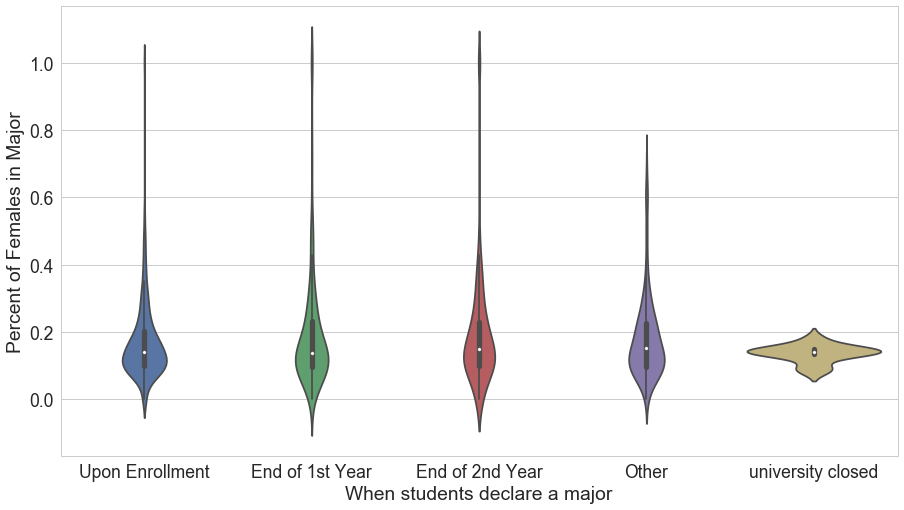

In [852]:
# Plot ungrouped, violin plots for percent of gradutes that are female, by when they have to declare major
sns.set(font_scale=1.75)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': '.15'})
fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax = sns.violinplot(x="When do students typically declare their major?", y = "Perc_F_majors", data=ungrouped, width=0.8, order=['Upon Enrollment','End of 1st Year','End of 2nd Year', 'Other', 'university closed'])
ax.set(xlabel = 'When students declare a major', ylabel='Percent of Females in Major')

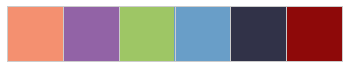

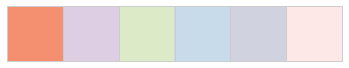

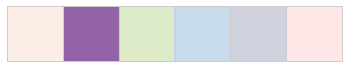

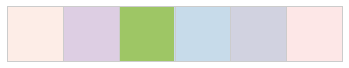

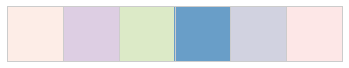

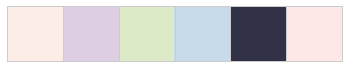

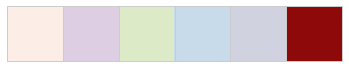

In [853]:
# create the custom palettes and show
palette1 = ["#F49070", "#9263A6", "#9ec665", "#699EC8", "#313248",  "#8e0909"]
sns.palplot(sns.color_palette(palette1))
p1 = sns.color_palette(palette1)

pop_palette1 = ["#F49070", "#ddcee3", "#dceac7", "#c7dbea", "#d1d2e0",  "#fde7e7"]
sns.palplot(sns.color_palette(pop_palette1))
pop1 = sns.color_palette(pop_palette1)

pop_palette2 = ["#fdede7", "#9263A6", "#dceac7", "#c7dbea", "#d1d2e0",  "#fde7e7"]
sns.palplot(sns.color_palette(pop_palette2))
pop2 = sns.color_palette(pop_palette2)

pop_palette3 = ["#fdede7", "#ddcee3", "#9ec665", "#c7dbea", "#d1d2e0",  "#fde7e7"]
sns.palplot(sns.color_palette(pop_palette3))
pop3 = sns.color_palette(pop_palette3)

pop_palette4 = ["#fdede7", "#ddcee3", "#dceac7", "#699EC8", "#d1d2e0",  "#fde7e7"]
sns.palplot(sns.color_palette(pop_palette4))
pop4 = sns.color_palette(pop_palette4)

pop_palette5 = ["#fdede7", "#ddcee3", "#dceac7", "#c7dbea", "#313248",  "#fde7e7"]
sns.palplot(sns.color_palette(pop_palette5))
pop5 = sns.color_palette(pop_palette5)

pop_palette6 = ["#fdede7", "#ddcee3", "#dceac7", "#c7dbea", "#d1d2e0",  "#8e0909"]
sns.palplot(sns.color_palette(pop_palette6))
pop6 = sns.color_palette(pop_palette6)

In [854]:
# set some global image parameters
dot_size = 4
font_size = 1.3
rotation_degrees = 0
font_color = '#303030'

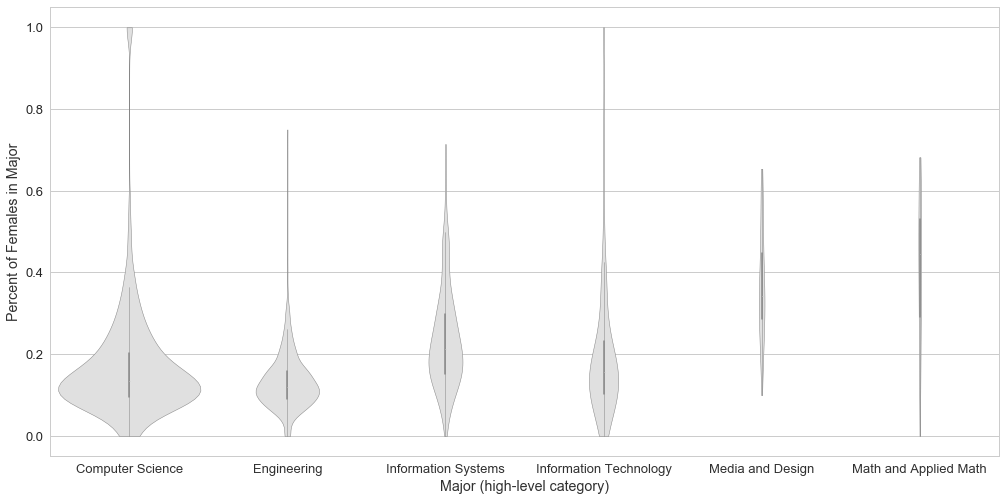

In [888]:
# ALL MAJORS: Plot ungrouped enrollment data, violin plots, categories are majors
sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8.27)
#ax.set_ylim([-0.1, 1.1])
ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped_enrolled, linewidth=0.5, order= ["Computer Science","Engineering","Information Systems","Information Technology","Media and Design", "Math and Applied Math"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
#ax = sns.swarmplot(x="Major", y = "Perc_F_majors", size=5, data=ungrouped, alpha=0.7, order= ["Computer Science","Engineering","Information Systems","Information Technology","Media and Design", "Math and Applied Math"], hue="When do students typically declare their major?", palette = p1, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation_degrees)
plt.savefig('output1.png', bbox_inches='tight')

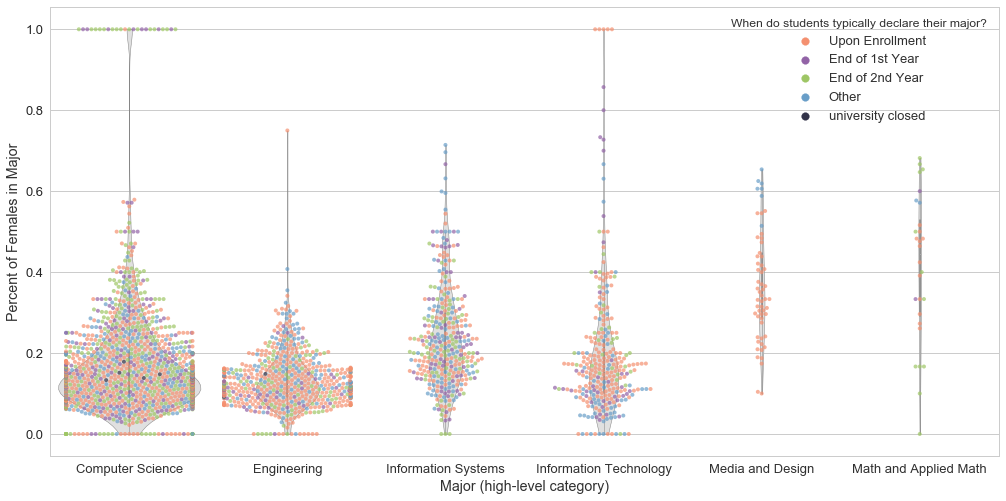

In [889]:
# ALL WHEN-TO-DECLARE CATEGORIES: Plot ungrouped enrollment data, violin plots with swarm on top, categories are majors, colors are when to declare. 
sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color, 'axes.labelsize': font_size})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8.27)
#ax.set_ylim([-0.1, 1.1])
ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped_enrolled, linewidth=0.5, order= ["Computer Science","Engineering","Information Systems","Information Technology","Media and Design", "Math and Applied Math"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", size=dot_size, data=ungrouped, alpha=0.7, order= ["Computer Science","Engineering","Information Systems","Information Technology","Media and Design", "Math and Applied Math"], hue="When do students typically declare their major?", palette = p1, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation_degrees)
plt.savefig('output2.png', bbox_inches='tight')

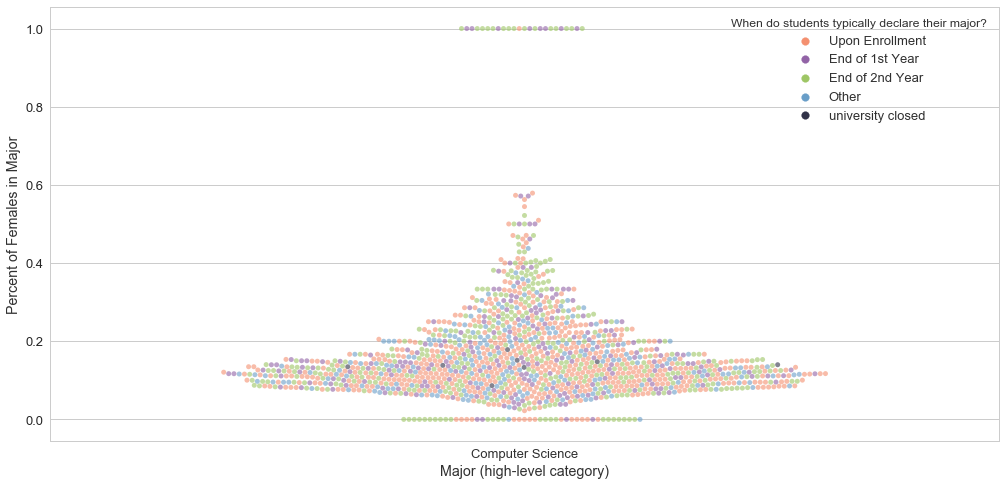

In [857]:
# ALL WHEN-TO-DECLARE CATEGORIES: Just show the CS majors
sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color, 'axes.labelsize': font_size})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8)
#ax.set_ylim([-0.1, 1.1])
#ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Computer Science"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", data=ungrouped, alpha=0.6, order= ["Computer Science"], hue="When do students typically declare their major?", palette = p1, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
plt.savefig('output2a.png', bbox_inches='tight')

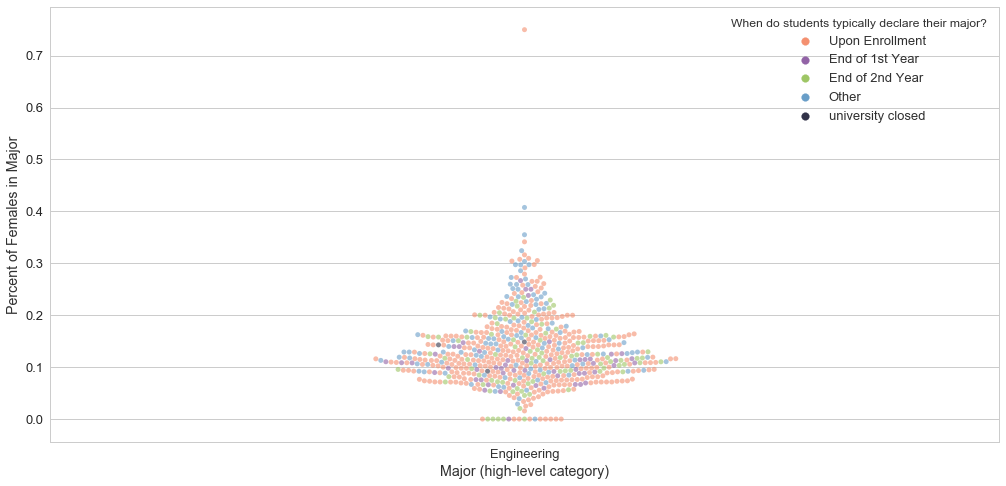

In [858]:
# ALL WHEN-TO-DECLARE CATEGORIES: Just show the engineering majors
sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color, 'axes.labelsize': font_size})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8)
#ax.set_ylim([-0.1, 1.1])
#ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Engineering"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", data=ungrouped, alpha=0.6, order= ["Engineering"], hue="When do students typically declare their major?", palette = p1, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
plt.savefig('output2b.png', bbox_inches='tight')

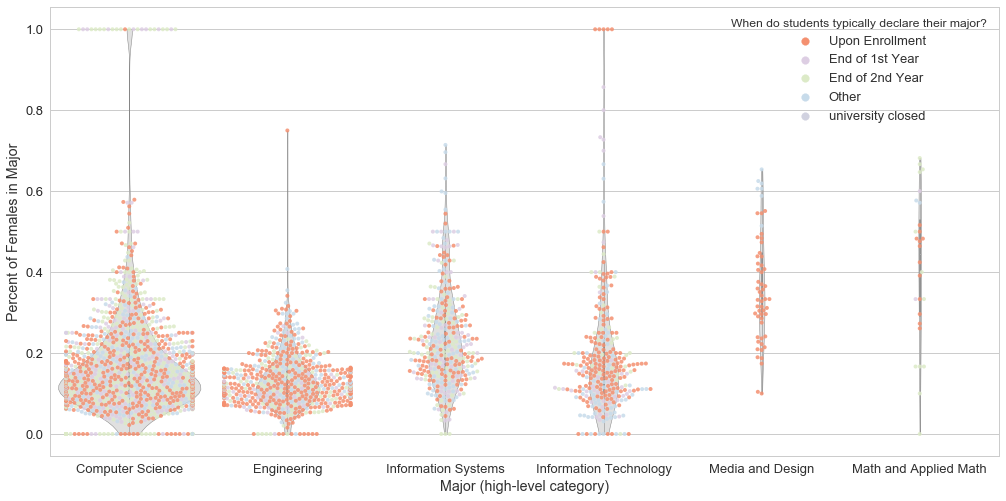

In [859]:
# DECLARE UPON ENROLLMENT: Plot ungrouped enrollment data, violin plots with swarm on top, categories are majors, colors are when to declare. 

sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8.27)
#ax.set_ylim([-0.1, 1.1])
ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Computer Science","Engineering","Information Systems","Information Technology","Media and Design", "Math and Applied Math"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", size=dot_size, data=ungrouped, alpha=0.85, order= ["Computer Science","Engineering","Information Systems","Information Technology","Media and Design", "Math and Applied Math"], hue="When do students typically declare their major?", palette = pop1, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation_degrees)
plt.savefig('output3.png', bbox_inches='tight')

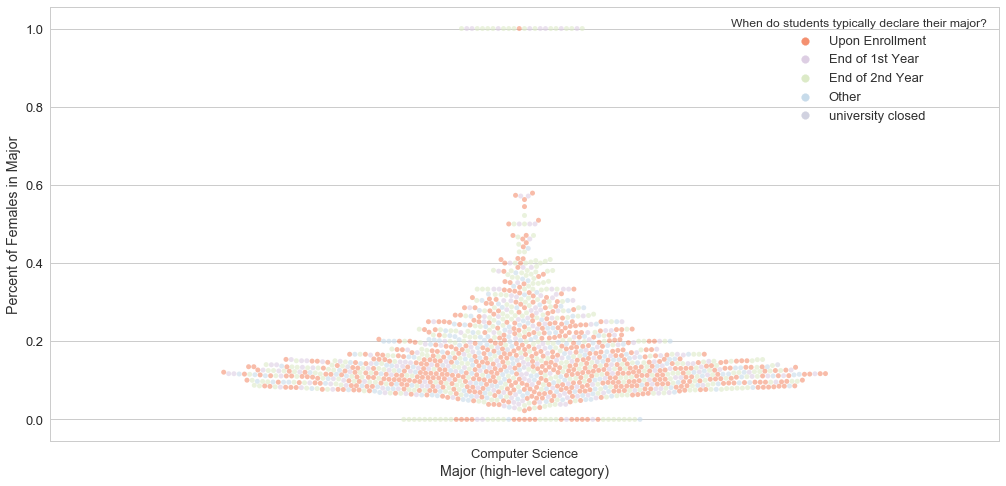

In [860]:
# Just show the CS majors

sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color, 'axes.labelsize': font_size})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8)
#ax.set_ylim([-0.1, 1.1])
#ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Computer Science"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", data=ungrouped, alpha=0.6, order= ["Computer Science"], hue="When do students typically declare their major?", palette = pop1, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
plt.savefig('output3a.png', bbox_inches='tight')

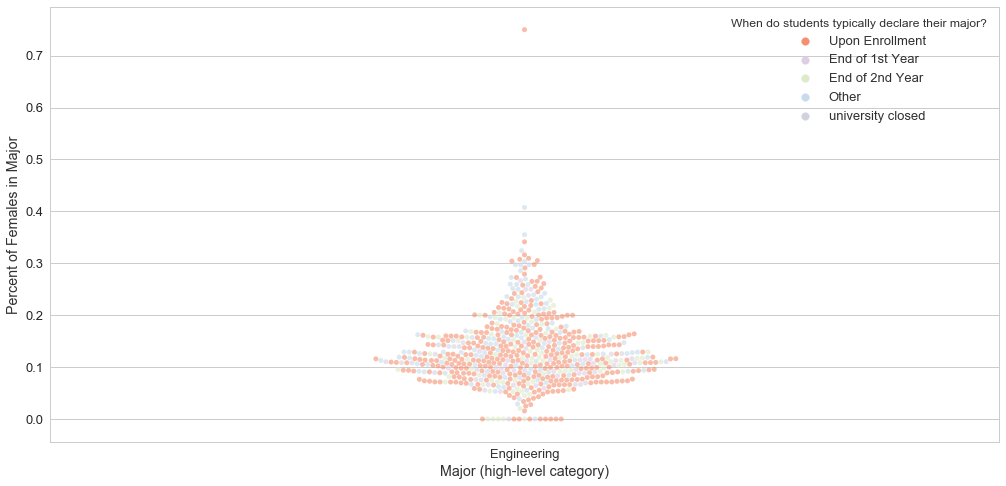

In [861]:
# Just show the engineering majors
sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color, 'axes.labelsize': font_size})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8)
#ax.set_ylim([-0.1, 1.1])
#ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Computer Science"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", data=ungrouped, alpha=0.6, order= ["Engineering"], hue="When do students typically declare their major?", palette = pop1, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
plt.savefig('output3b.png', bbox_inches='tight')

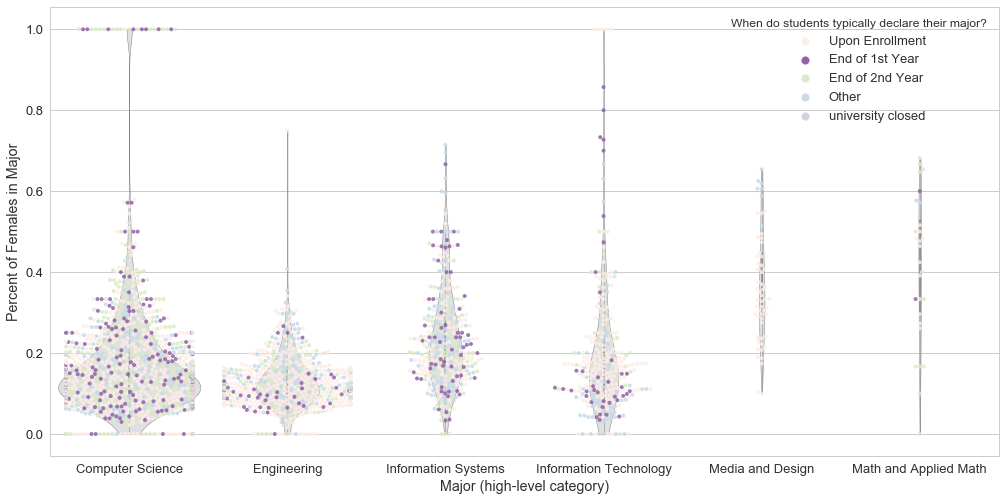

In [862]:
# DECALRE END 1ST YEAR: Plot ungrouped enrollment data, violin plots with swarm on top, categories are majors, colors are when to declare. 

sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8.27)
#ax.set_ylim([-0.1, 1.1])
ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Computer Science","Engineering","Information Systems","Information Technology","Media and Design", "Math and Applied Math"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", data=ungrouped, size=dot_size, alpha=0.85, order= ["Computer Science","Engineering","Information Systems","Information Technology","Media and Design", "Math and Applied Math"], hue="When do students typically declare their major?", palette = pop2, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation_degrees)
plt.savefig('output4.png', bbox_inches='tight')

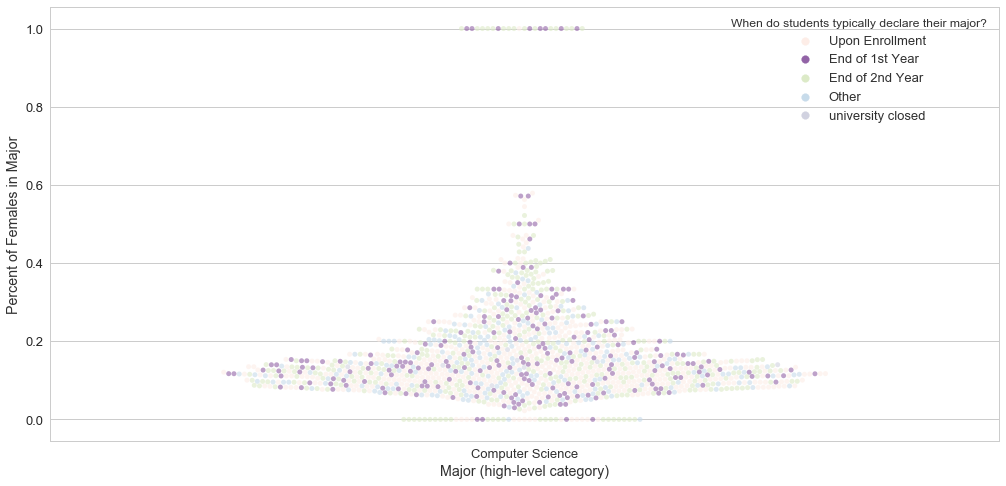

In [875]:
# Just show the CS majors
sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color, 'axes.labelsize': font_size})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8)
#ax.set_ylim([-0.1, 1.1])
#ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Computer Science"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", data=ungrouped, alpha=0.6, order= ["Computer Science"], hue="When do students typically declare their major?", palette = pop2, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
plt.savefig('output4a.png', bbox_inches='tight')

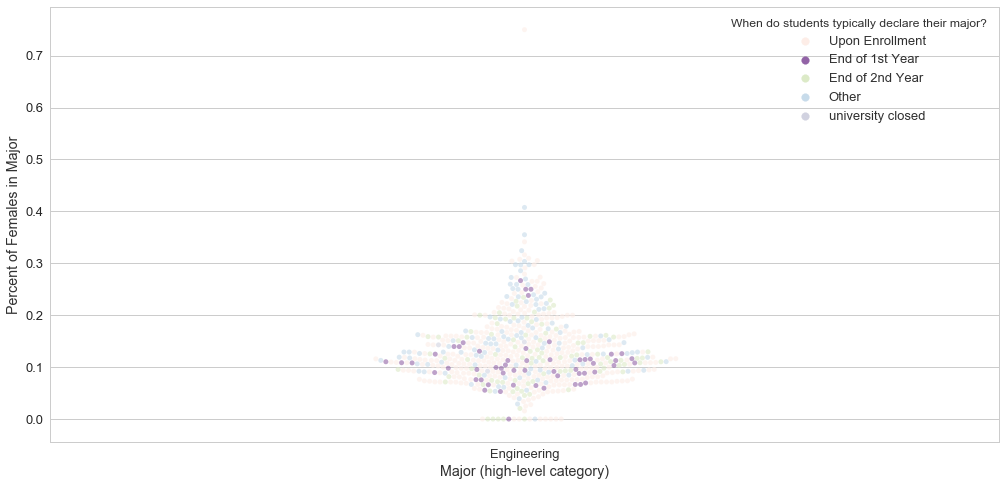

In [876]:
# Just show the engineering majors
sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color, 'axes.labelsize': font_size})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8)
#ax.set_ylim([-0.1, 1.1])
#ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Computer Science"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", data=ungrouped, alpha=0.6, order= ["Engineering"], hue="When do students typically declare their major?", palette = pop2, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
plt.savefig('output4b.png', bbox_inches='tight')

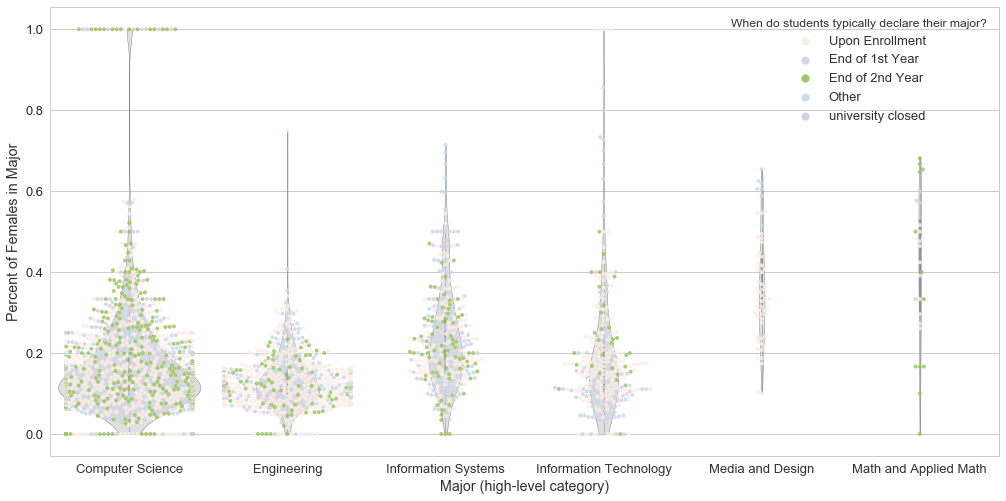

In [865]:
# DECLARE END 2ND YEAR: Plot ungrouped enrollment data, violin plots with swarm on top, categories are majors, colors are when to declare. 

sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8.27)
#ax.set_ylim([-0.1, 1.1])
ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Computer Science","Engineering","Information Systems","Information Technology","Media and Design", "Math and Applied Math"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", size=dot_size, data=ungrouped, alpha=0.85, order= ["Computer Science","Engineering","Information Systems","Information Technology","Media and Design", "Math and Applied Math"], hue="When do students typically declare their major?", palette = pop3, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation_degrees)
plt.savefig('output5.png', bbox_inches='tight')

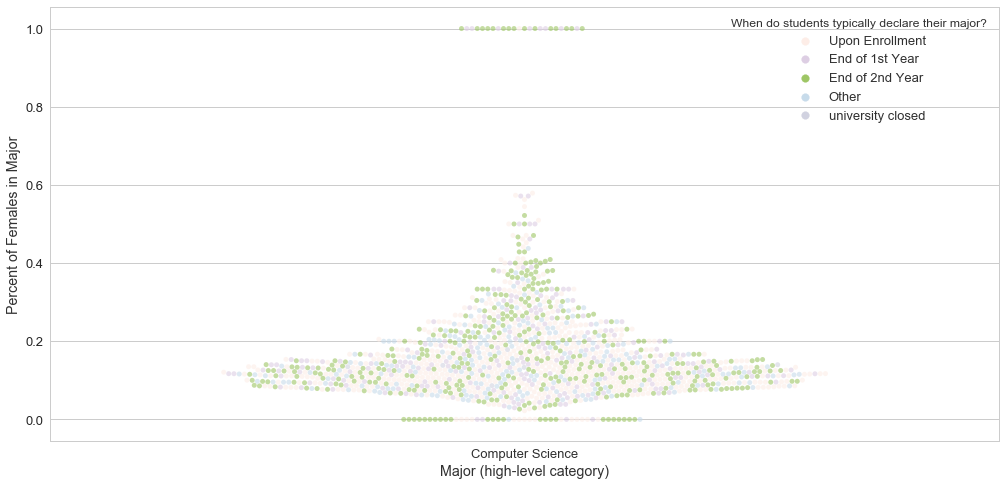

In [866]:
# Just show the CS majors
sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color, 'axes.labelsize': font_size})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8)
#ax.set_ylim([-0.1, 1.1])
#ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Computer Science"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", data=ungrouped, alpha=0.6, order= ["Computer Science"], hue="When do students typically declare their major?", palette = pop3, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
plt.savefig('output5a.png', bbox_inches='tight')

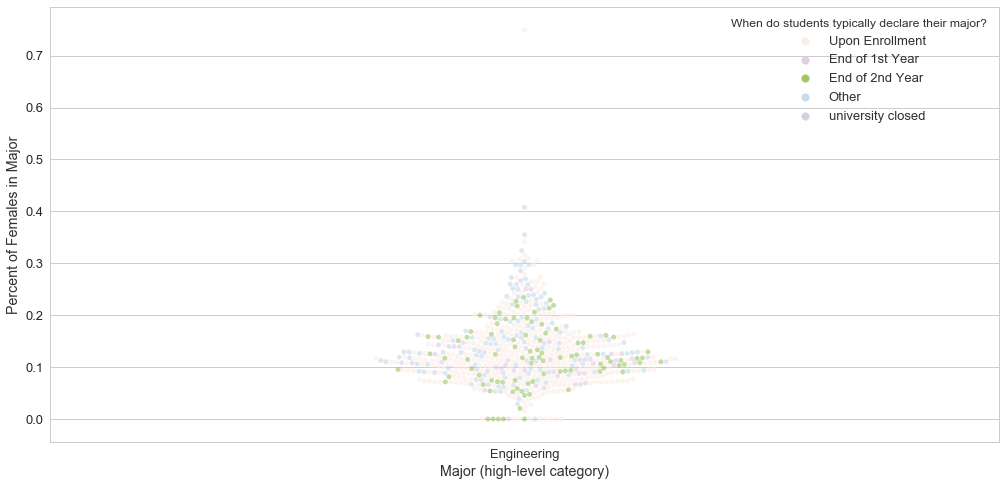

In [867]:
# Just show the engineering majors
sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color, 'axes.labelsize': font_size})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8)
#ax.set_ylim([-0.1, 1.1])
#ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Computer Science"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", data=ungrouped, alpha=0.6, order= ["Engineering"], hue="When do students typically declare their major?", palette = pop3, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
plt.savefig('output5b.png', bbox_inches='tight')

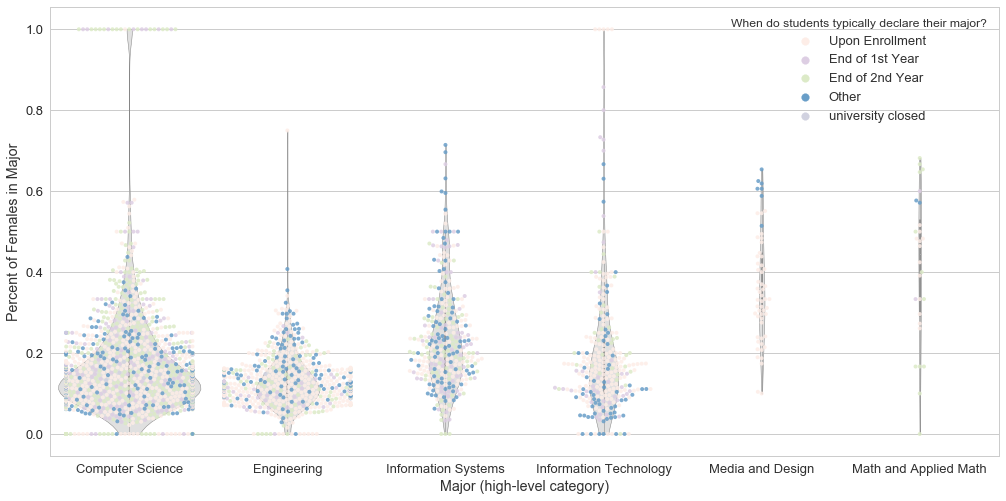

In [868]:
# OTHER: Plot ungrouped enrollment data, violin plots with swarm on top, categories are majors, colors are when to declare. 

sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8.27)
#ax.set_ylim([-0.1, 1.1])
ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Computer Science","Engineering","Information Systems","Information Technology","Media and Design", "Math and Applied Math"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", data=ungrouped, size=dot_size, alpha=0.85, order= ["Computer Science","Engineering","Information Systems","Information Technology","Media and Design", "Math and Applied Math"], hue="When do students typically declare their major?", palette = pop4, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation_degrees)
plt.savefig('output6.png', bbox_inches='tight')

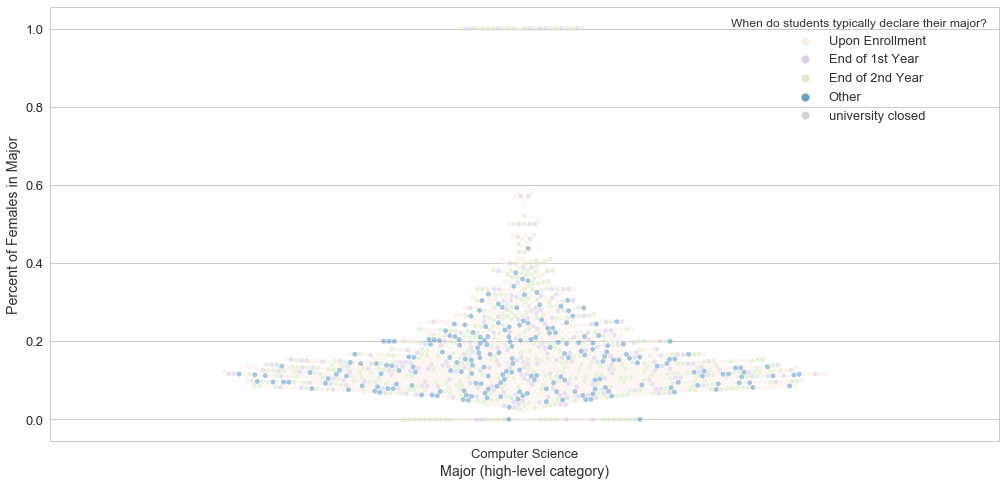

In [869]:
# Just show the CS majors
sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color, 'axes.labelsize': font_size})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8)
#ax.set_ylim([-0.1, 1.1])
#ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Computer Science"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", data=ungrouped, alpha=0.6, order= ["Computer Science"], hue="When do students typically declare their major?", palette = pop4, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
plt.savefig('output6a.png', bbox_inches='tight')

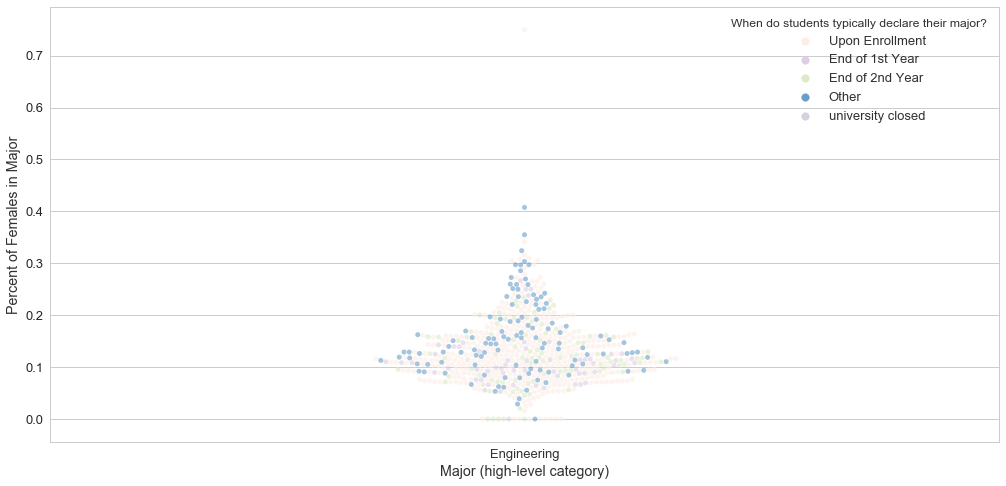

In [870]:
# Just show the engineering majors
sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': font_color, 'xtick.color': font_color, 'axes.labelcolor': font_color, 'axes.labelsize': font_size})
fig, ax = plt.subplots()
fig.set_size_inches(17, 8)
#ax.set_ylim([-0.1, 1.1])
#ax = sns.violinplot(x="Major", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order= ["Computer Science"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="Major", y = "Perc_F_majors", data=ungrouped, alpha=0.6, order= ["Engineering"], hue="When do students typically declare their major?", palette = pop4, hue_order = ["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"])
ax.set(xlabel = 'Major (high-level category)', ylabel='Percent of Females in Major')
plt.savefig('output6b.png', bbox_inches='tight')

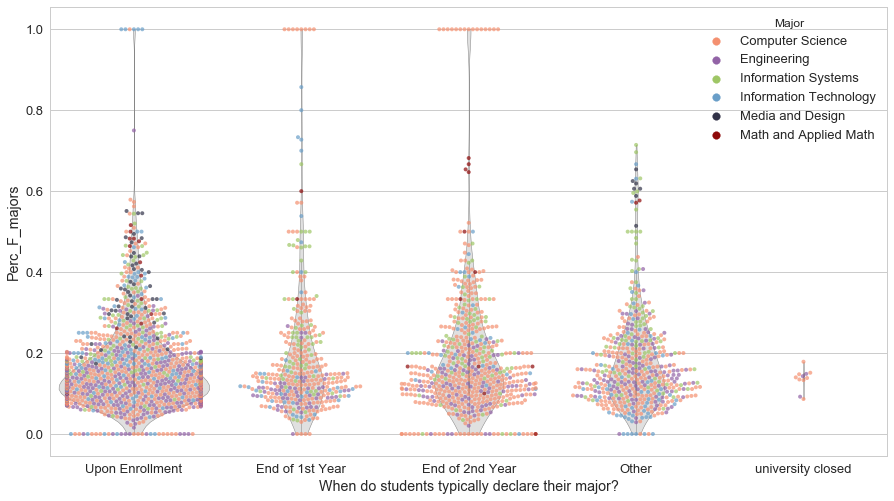

In [871]:
# Plot ungrouped, violin plots for percent of percent majors that are female, by when they have to declare major, color shows major
sns.set(font_scale=font_size)
sns.set_style("whitegrid", {'font.sans-serif': [u'Arial'], 'text.color': '.15'})
fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
#ax.set_ylim([-0.1, 1.1])
ax = sns.violinplot(x="When do students typically declare their major?", y = "Perc_F_majors", data=ungrouped, linewidth=0.5, order=["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"], scale = "count", color = "#E0E0E0", width=0.9, cut=0, saturation = 0.7)
ax = sns.swarmplot(x="When do students typically declare their major?", size=dot_size, y = "Perc_F_majors", data=ungrouped, alpha=0.7, order=["Upon Enrollment","End of 1st Year", "End of 2nd Year","Other","university closed"], hue="Major", palette = p1, hue_order = ["Computer Science","Engineering","Information Systems","Information Technology","Media and Design", "Math and Applied Math"])


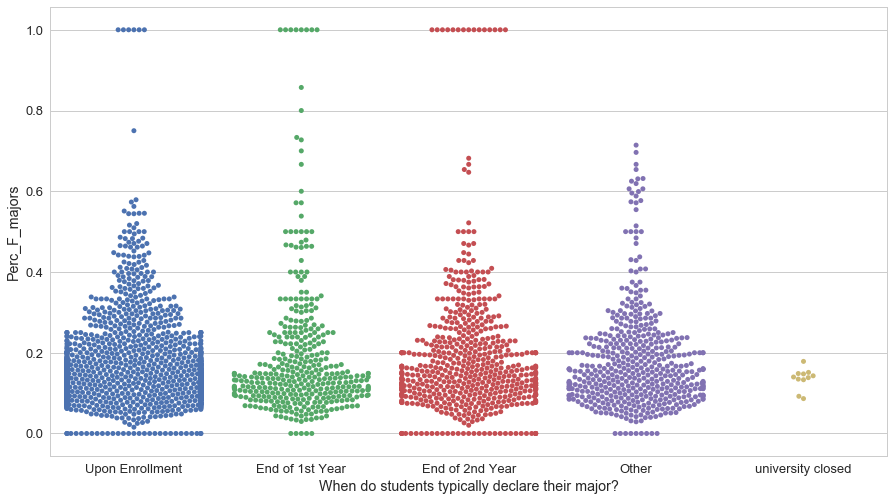

In [890]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(15, 8.27)
ax = sns.swarmplot(x="When do students typically declare their major?", y="Perc_F_majors", data=ungrouped_enrolled, order=['Upon Enrollment','End of 1st Year','End of 2nd Year', 'Other', 'university closed'])